# Prática 3: Desempenho de modulação digital sujeito a Desvanecimento Rayleigh

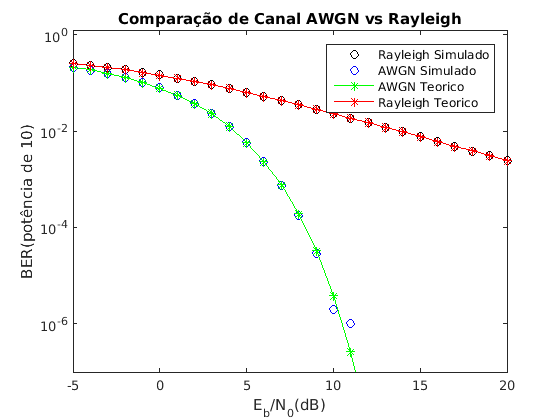

In [1]:
clear all; clc; close all;
N=10^6;
d=rand(1,N)>0.5; %dados binarios
x=2*d-1; %modulacao BPSK
EbN0dB= -5:1:20; %Valores em dB do Eb/N0
simBER_rayleigh = zeros(1,length(EbN0dB));
simBER_awgn = zeros(1,length(EbN0dB));
for i=1:length(EbN0dB)
    sigmaRuido = (1/sqrt(2));  %sqrt(N0/2) para ruidos complexos com desvio padrão 1
    ruido = sigmaRuido*(randn(1,N)+1i*randn(1,N)); % Ruido AWGN
    h=sigmaRuido*(randn(1,N)+1i*randn(1,N)); %Coeficientes de Rayleigh
    n=ruido*10^(-EbN0dB(i)/20); % multiplicando o ruido pelo Eb/N0 desejado
    y_awgn = x+n; %Sinal recebido pelo canal AWGN
    y_rayleigh = h.*x+n; %Sinal recebido pelo canal de rayleigh
    %Receptor coerente para o canal de rayleigh
    y_rayleigh_cap=y_rayleigh./h; %Assumindo que h é conhecido precisamente
    r_rayleigh=real(y_rayleigh_cap)>0; 
    %Receptor para o canal AWGN
    r_awgn=real(y_awgn)>0;
    simBER_rayleigh(i)=sum(xor(d,r_rayleigh));
    simBER_awgn(i)=sum(xor(d,r_awgn));
end
simBER_rayleigh=simBER_rayleigh/N;
simBER_awgn=simBER_awgn/N;
%BER teorica
EbN0=10.^(EbN0dB/10); %Eb/N0 na escala Linear
rayleigh_teorico=0.5*(1-sqrt(EbN0./(1+EbN0)));
awgn_teorico=0.5*erfc(sqrt(EbN0));
semilogy(EbN0dB,simBER_rayleigh,'ko');
hold on;
semilogy(EbN0dB,simBER_awgn,'bo');
hold on;
semilogy(EbN0dB,awgn_teorico,'g*-');
hold on;
semilogy(EbN0dB,rayleigh_teorico,'r*-');
legend('Rayleigh Simulado','AWGN Simulado','AWGN Teorico','Rayleigh Teorico');
axis([-5 20 10^-7 1.2]);
xlabel('E_b/N_0(dB)');
ylabel('BER(potência de 10)');
title('Comparação de Canal AWGN vs Rayleigh');


# Prática 4: Desempenho de modulação digital sujeito a Desvanecimento Rice

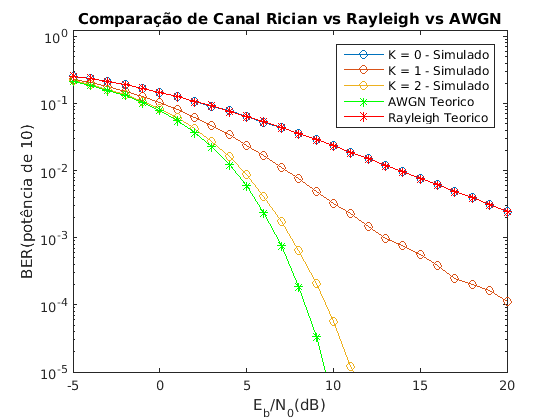

In [2]:
clear all; clc; close all;
N=10^6;
d=rand(1,N)>0.5; %dados binarios
x=2*d-1; %modulacao BPSK
K=[0,5,30];
totPower=1;
EbN0dB= -5:1:20; %Valores em dB do Eb/N0
simBER_ricean = zeros(1,length(EbN0dB));
for l = 1:length(K)
    Kaux=K(l);
    s = sqrt( (Kaux/(Kaux+1))*totPower );
    sigma = totPower/sqrt(2*(Kaux+1));
    for i=1:length(EbN0dB)
        sigmaRuido = (1/sqrt(2));  %sqrt(N0/2) para ruidos complexos com desvio padrão 1
        ruido = sigmaRuido*(randn(1,N)+1i*randn(1,N)); % Ruido AWGN
        h=((sigma*randn(1,N)+s)+1i*(randn(1,N)*sigma+0)); %Coeficientes de Rice
        n=ruido*10^(-EbN0dB(i)/20); % multiplicando o ruido pelo Eb/N0 desejado
        y_ricean=h.*x+n;
        %y_awgn = x+n; %Sinal recebido pelo canal AWGN
        %y_Rice = h.*x+n; %Sinal recebido pelo canal de Rice
        %Receptor coerente para o Rice
        y_ricean_cap=y_ricean./h;
        r_ricean=real(y_ricean_cap)>0; 
        
        %y_rayleigh_cap=y_rayleigh./h; %Assumindo que h � conhecido precisamente
        %r_rayleigh=real(y_rayleigh_cap)>0; 
        %Receptor para o canal AWGN
        %r_awgn=real(y_awgn)>0;
        simBER_ricean(i)=sum(xor(d,r_ricean));
        %simBER_rayleigh(i)=sum(xor(d,r_rayleigh));
        %simBER_awgn(i)=sum(xor(d,r_awgn));
    end
    simBER_ricean=simBER_ricean/N;
    semilogy(EbN0dB,simBER_ricean,'-o');
    hold on;
end

%simBER_rayleigh=simBER_rayleigh/N;
%simBER_awgn=simBER_awgn/N;
%BER teorica
EbN0=10.^(EbN0dB/10); %Eb/N0 na escala Linear
rayleigh_teorico=0.5*(1-sqrt(EbN0./(1+EbN0)));
awgn_teorico=0.5*erfc(sqrt(EbN0));
%semilogy(EbN0dB,simBER_rayleigh,'ko');
hold on;
%semilogy(EbN0dB,simBER_awgn,'bo');
hold on;
semilogy(EbN0dB,awgn_teorico,'g*-');
hold on;
semilogy(EbN0dB,rayleigh_teorico,'r*-');
legend('K = 0 - Simulado','K = 1 - Simulado','K = 2 - Simulado','AWGN Teorico','Rayleigh Teorico');
axis([-5 20 10^-5 1.2]);
xlabel('E_b/N_0(dB)');
ylabel('BER(potência de 10)');
title('Comparação de Canal Rician vs Rayleigh vs AWGN');
    